In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

# 读取训练数据
with open('training.txt', 'r') as f:
    content = f.read()

# 解析数据
epochs = []
train_losses = []
accuracies = []
macro_f1s = []
pos_class_f1s = []

# 使用正则表达式提取数据
epoch_pattern = r'Epoch (\d+)/10 - Train Loss: ([\d.]+)'
val_pattern = r'Accuracy: ([\d.]+)\nMacro F1: ([\d.]+)\nPos-class \(SB=1\) F1: ([\d.]+)'

epoch_matches = re.findall(epoch_pattern, content)
val_matches = re.findall(val_pattern, content)

for i, (epoch, loss) in enumerate(epoch_matches):
    epochs.append(int(epoch))
    train_losses.append(float(loss))
    
    if i < len(val_matches):
        acc, macro_f1, pos_f1 = val_matches[i]
        accuracies.append(float(acc))
        macro_f1s.append(float(macro_f1))
        pos_class_f1s.append(float(pos_f1))

print(f"成功解析 {len(epochs)} 个epoch的数据")
print(f"Epochs: {epochs}")
print(f"Train Losses: {train_losses}")
print(f"Accuracies: {accuracies}")
print(f"Macro F1s: {macro_f1s}")
print(f"Pos-class F1s: {pos_class_f1s}")


成功解析 10 个epoch的数据
Epochs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Train Losses: [1.0026, 0.8993, 0.8812, 0.8753, 0.8713, 0.8678, 0.8648, 0.8645, 0.8644, 0.8615]
Accuracies: [0.6313594662218516, 0.6839032527105922, 0.6438698915763136, 0.700583819849875, 0.6880733944954128, 0.6947456213511259, 0.7097581317764804, 0.7172643869891576, 0.6964136780650542, 0.7055879899916597]
Macro F1s: [0.5937076425815869, 0.632077862458212, 0.6094388056741159, 0.646767500125146, 0.6402899973689108, 0.6454703213463975, 0.650704197054628, 0.6594563345942617, 0.6468964401294499, 0.6526711073653941]
Pos-class F1s: [0.47002398081534774, 0.4939919893190921, 0.49347568208778175, 0.5088919288645691, 0.5091863517060368, 0.5132978723404256, 0.5070821529745042, 0.5191489361702127, 0.5146666666666667, 0.5170998632010944]


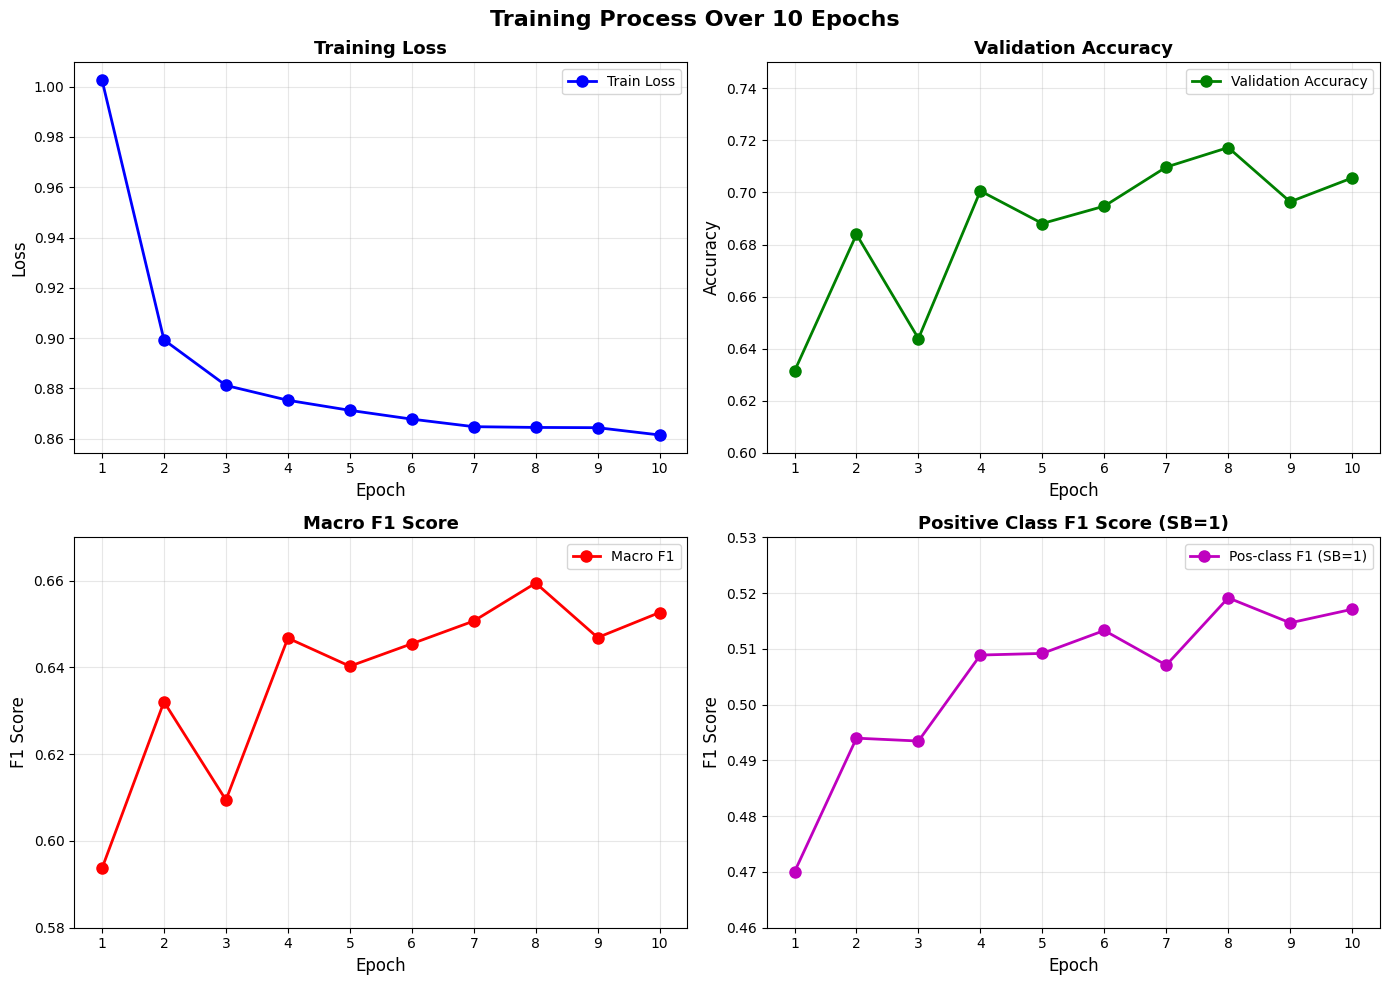


Training Summary
Best Validation Accuracy: 0.7173 (Epoch 8)
Best Macro F1: 0.6595 (Epoch 8)
Best Pos-class F1: 0.5191 (Epoch 8)
Final Training Loss: 0.8615
Final Validation Accuracy: 0.7056
Final Macro F1: 0.6527
Final Pos-class F1: 0.5171


In [2]:
# 创建综合训练过程可视化
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Training Process Over 10 Epochs', fontsize=16, fontweight='bold')

# 1. Training Loss
axes[0, 0].plot(epochs, train_losses, 'b-o', linewidth=2, markersize=8, label='Train Loss')
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Loss', fontsize=12)
axes[0, 0].set_title('Training Loss', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()
axes[0, 0].set_xticks(epochs)

# 2. Validation Accuracy
axes[0, 1].plot(epochs, accuracies, 'g-o', linewidth=2, markersize=8, label='Validation Accuracy')
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Accuracy', fontsize=12)
axes[0, 1].set_title('Validation Accuracy', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()
axes[0, 1].set_xticks(epochs)
axes[0, 1].set_ylim([0.6, 0.75])

# 3. Macro F1 Score
axes[1, 0].plot(epochs, macro_f1s, 'r-o', linewidth=2, markersize=8, label='Macro F1')
axes[1, 0].set_xlabel('Epoch', fontsize=12)
axes[1, 0].set_ylabel('F1 Score', fontsize=12)
axes[1, 0].set_title('Macro F1 Score', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()
axes[1, 0].set_xticks(epochs)
axes[1, 0].set_ylim([0.58, 0.67])

# 4. Positive Class (SB=1) F1 Score
axes[1, 1].plot(epochs, pos_class_f1s, 'm-o', linewidth=2, markersize=8, label='Pos-class F1 (SB=1)')
axes[1, 1].set_xlabel('Epoch', fontsize=12)
axes[1, 1].set_ylabel('F1 Score', fontsize=12)
axes[1, 1].set_title('Positive Class F1 Score (SB=1)', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()
axes[1, 1].set_xticks(epochs)
axes[1, 1].set_ylim([0.46, 0.53])

plt.tight_layout()
plt.show()

# Print key statistics in English
print("\n" + "="*60)
print("Training Summary")
print("="*60)
print(f"Best Validation Accuracy: {max(accuracies):.4f} (Epoch {epochs[accuracies.index(max(accuracies))]})")
print(f"Best Macro F1: {max(macro_f1s):.4f} (Epoch {epochs[macro_f1s.index(max(macro_f1s))]})")
print(f"Best Pos-class F1: {max(pos_class_f1s):.4f} (Epoch {epochs[pos_class_f1s.index(max(pos_class_f1s))]})")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Accuracy: {accuracies[-1]:.4f}")
print(f"Final Macro F1: {macro_f1s[-1]:.4f}")
print(f"Final Pos-class F1: {pos_class_f1s[-1]:.4f}")
print("="*60)


## 训练分析：10个Epoch是否足够？

### 观察结果：

1. **训练损失 (Training Loss)**: 从 1.0026 持续下降到 0.8615，下降趋势稳定但逐渐放缓
2. **验证准确率 (Validation Accuracy)**: 
   - 从 0.631 提升到 0.706
   - **最佳表现**: Epoch 8 (0.717)
   - Epoch 9-10 出现轻微下降，可能存在过拟合风险
3. **Macro F1**: 
   - 从 0.594 提升到 0.653
   - **最佳表现**: Epoch 8 (0.659)
4. **Pos-class F1 (SB=1)**: 
   - 从 0.470 提升到 0.517
   - **最佳表现**: Epoch 8 (0.519)

### 结论：

**10个Epoch基本足够，但建议：**

✅ **优点**:
- 训练损失持续下降，模型在学习
- 验证指标在Epoch 8达到最佳
- 整体性能有明显提升

⚠️ **需要注意**:
- Epoch 8之后验证指标出现波动/下降，可能出现过拟合
- 训练损失仍在下降，但验证指标已开始波动
- 建议使用Early Stopping，在Epoch 8保存最佳模型

**建议**:
- 如果继续训练，建议添加Early Stopping机制（patience=2-3）
- 当前10个epoch已经能够获得较好的性能
- 可以考虑使用Epoch 8的模型作为最终模型
